In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

from scipy import stats

In [2]:
def get_t_score_from_p_value(p_val_ref,df):
    t_score = 1
    p_val = 2*(1 - stats.t.cdf(t_score,df=df))
    err = 0.0000001
    factor = 10

    while abs(p_val - p_val_ref) > err:
        t_score = t_score + (p_val - p_val_ref)*factor
        p_val = 2*(1 - stats.t.cdf(t_score,df=df))
        
    return t_score

# MQ2008

In [3]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [4]:
dataset_path = "../../MQ2008/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of our personal ListNet implementation

In [5]:
my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_global_vali.csv"
my_listnet_df = pd.read_csv(my_listnet_path)

my_listnet_df = my_listnet_df.sort_values(['NDCG_Mean'],ascending=False)
my_listnet_top_model_id = my_listnet_df.index[0]

In [6]:
#TOP 5 MODELS OF OUR PERSONAL LISTNET IMPLEMENTATION
my_listnet_df.head(5)

,epochs,learning_rate,momemtum,activation,inner_act,number_layers,number_neurons,dropout,P@1,P@2,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
28,600,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.50000,0.44960,...,0.48128,0.49710,0.51280,0.52386,0.52836,0.48814,0.23820,0.24182,0.440948,0.010778
24,500,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.48934,0.44684,...,0.47484,0.49366,0.50820,0.52056,0.52520,0.48508,0.23612,0.24006,0.436548,0.010628
31,600,0.0025,0.5,linear,relu,2.0,100.0,0.80,0.48256,0.44128,...,0.47408,0.49100,0.50692,0.51710,0.52134,0.48150,0.23310,0.23682,0.433206,0.010670
27,500,0.0025,0.5,linear,relu,2.0,100.0,0.80,0.48086,0.43684,...,0.47028,0.48764,0.50166,0.51322,0.51774,0.47784,0.22948,0.23338,0.430202,0.010633
23,400,0.0025,0.5,linear,relu,2.0,100.0,0.80,0.47786,0.43704,...,0.46684,0.48602,0.50032,0.51190,0.51654,0.47744,0.23146,0.23494,0.429128,0.010375


In [7]:
my_listnet_df.iloc[0]["P_Mean"]

0.356508

### NDCG measures for the top models of LTR4L implementation

In [8]:
ltr4l_path = "../../MQ2008/results_summary/Results_ltr4l_global_vali.csv"
ltr4l_df = pd.read_csv(ltr4l_path)

ltr4l_df = ltr4l_df.sort_values(['NDCG_Mean'],ascending=False)
ltr4l_top_model_id = ltr4l_df.index[0]

In [9]:
#TOP 5 MODELS OF THE LTR4L IMPLEMENTATION
ltr4l_df.head(5)

,epochs,learning_rate,momentum,output function,hidden function,nb hidden layers,nb neurons,P@1,P@2,P@3,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
2,100,0.001,0.10,Identity,NaN,NaN,NaN,0.45874,0.41792,0.39240,...,0.43742,0.45888,0.47838,0.49170,0.49754,0.46064,0.22522,0.22950,0.407946,0.009188
0,100,0.001,0.01,Identity,NaN,NaN,NaN,0.45872,0.41772,0.39198,...,0.43720,0.45884,0.47826,0.49160,0.49744,0.46050,0.22498,0.22932,0.407856,0.009194
4,100,0.001,0.30,Identity,NaN,NaN,NaN,0.45832,0.41792,0.39212,...,0.43702,0.45876,0.47812,0.49146,0.49742,0.46056,0.22510,0.22936,0.407744,0.009185
14,500,0.001,0.10,Identity,NaN,NaN,NaN,0.45620,0.41772,0.39198,...,0.43674,0.45876,0.47796,0.49142,0.49752,0.46062,0.22536,0.22972,0.407578,0.009167
12,500,0.001,0.01,Identity,NaN,NaN,NaN,0.45620,0.41772,0.39198,...,0.43674,0.45876,0.47796,0.49142,0.49752,0.46062,0.22536,0.22970,0.407576,0.009167


In [10]:
ltr4l_df.iloc[0]["P_Mean"]

0.341772

### Comparison NDCG measures between top model of personal ListNet and LTR4L

In [12]:
my_listnet_mean = [[] for x in range(len(datasets))]
my_listnet_var = [[] for x in range(len(datasets))]

ltr4l_mean = [[] for x in range(len(datasets))]
ltr4l_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    my_listnet_list_NDCG = [[] for x in range(len(measures_names))]
    ltr4l_list_NDCG = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ltr4l_path = "../../MQ2008/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_list_NDCG[idx_metric].append(my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]])
            ltr4l_list_NDCG[idx_metric].append(ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]])
            
    my_listnet_mean[idx_dataset] = np.array(my_listnet_list_NDCG).mean(axis=1)
    my_listnet_var[idx_dataset] = np.array(my_listnet_list_NDCG).var(axis=1)
    
    ltr4l_mean[idx_dataset] = np.array(ltr4l_list_NDCG).mean(axis=1)
    ltr4l_var[idx_dataset] = np.array(ltr4l_list_NDCG).var(axis=1)

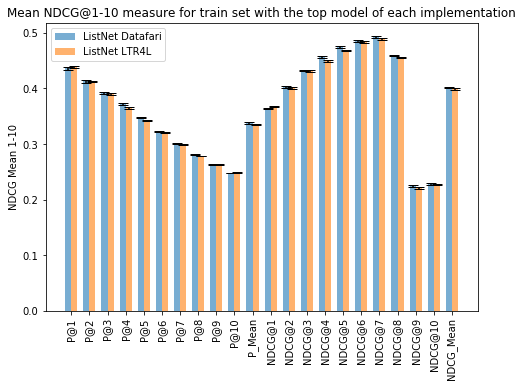

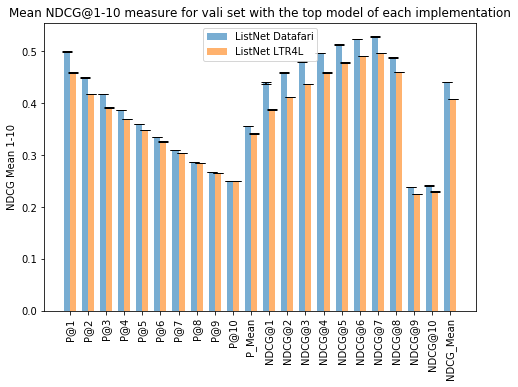

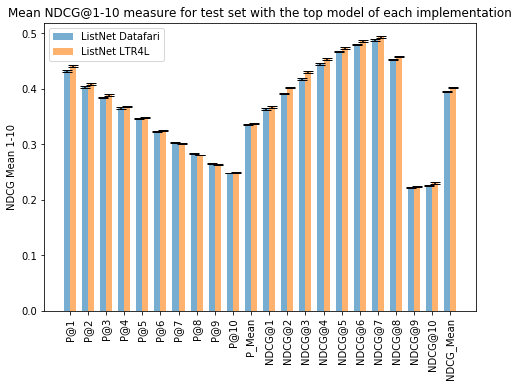

In [13]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, my_listnet_mean[idx_dataset],width, yerr = my_listnet_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet Datafari")
    ax.bar(indices+width/2, ltr4l_mean[idx_dataset],width, yerr = ltr4l_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet LTR4L")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [14]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [15]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ltr4l_path = "../../MQ2008/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_NDCG = my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]]
            ltr4l_NDCG = ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]]
            diff[idx_metric].append(my_listnet_NDCG - ltr4l_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


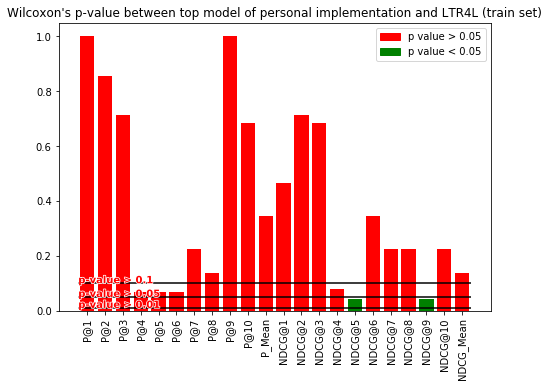

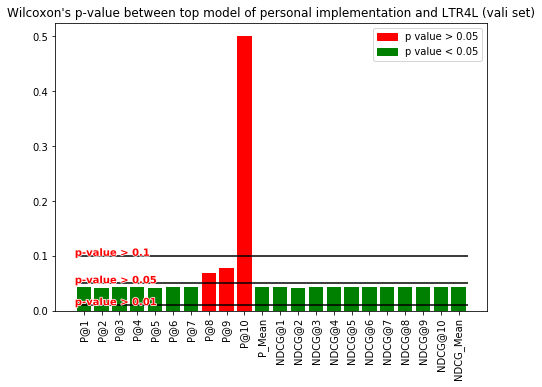

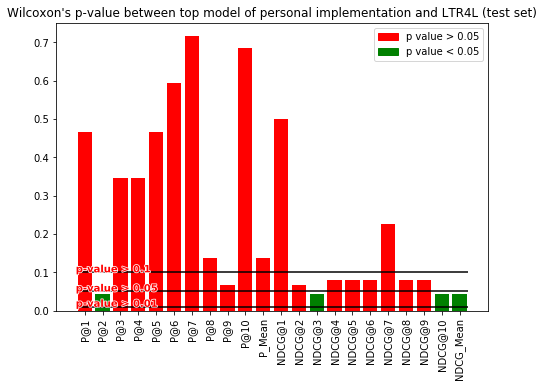

In [16]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of personal implementation and LTR4L ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [17]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,3,4.5,4,0,0,0,3,2,3,6,4,3,4,6,1,0,4,3,3,0,3,2
vali,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0
test,3,0,4,4,3,2,4,2,0,6,2,5,0,0,1,1,1,3,1,1,0,0


In [18]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,1,0.853923,0.715001,0.0678892,0.0678892,0.0678892,0.224916,0.138011,1,0.68583,0.345231,0.465209,0.715001,0.68583,0.0796158,0.0431144,0.345231,0.224916,0.224916,0.0431144,0.224916,0.138011
vali,0.0431144,0.0421682,0.0431144,0.0431144,0.0421682,0.0431144,0.0431144,0.0678892,0.0782482,0.500184,0.0431144,0.0431144,0.0421682,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144
test,0.465209,0.0431144,0.345231,0.345231,0.465209,0.59298,0.715001,0.138011,0.0678892,0.68583,0.138011,0.500184,0.0678892,0.0431144,0.0796158,0.0796158,0.0796158,0.224916,0.0796158,0.0796158,0.0431144,0.0431144


# MQ2007

In [23]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [24]:
dataset_path = "../../MQ2007/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of our personal implementation

In [25]:
my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_global_vali.csv"
my_listnet_df = pd.read_csv(my_listnet_path)

my_listnet_df = my_listnet_df.sort_values(['NDCG_Mean'],ascending=False)
my_listnet_top_model_id = my_listnet_df.index[0]

In [26]:
my_listnet_df.head(5)

,epochs,learning_rate,momemtum,activation,inner_act,number_layers,number_neurons,dropout,P@1,P@2,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
28,600,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.48170,0.46416,...,0.42696,0.43254,0.43758,0.44402,0.44842,0.45414,0.45856,0.46358,0.440786,0.000214
24,500,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.47636,0.46208,...,0.42340,0.42814,0.43314,0.43840,0.44384,0.44916,0.45376,0.45900,0.436204,0.000208
30,600,0.0025,0.5,linear,relu,2.0,100.0,0.65,0.47734,0.46052,...,0.42262,0.42822,0.43324,0.43834,0.44328,0.44856,0.45334,0.45890,0.435820,0.000211
26,500,0.0025,0.5,linear,relu,2.0,100.0,0.65,0.47320,0.45716,...,0.42044,0.42528,0.43004,0.43478,0.43972,0.44456,0.44960,0.45504,0.432546,0.000198
20,400,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.47952,0.45854,...,0.41716,0.42350,0.42870,0.43358,0.43860,0.44442,0.44964,0.45524,0.432252,0.000188


In [27]:
my_listnet_df.iloc[0]["P_Mean"]

0.430972

In [28]:
my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_global_test.csv"
my_listnet_df = pd.read_csv(my_listnet_path)
my_listnet_df.iloc[my_listnet_top_model_id]

epochs                    600
learning_rate          0.0025
momemtum                  0.5
activation             linear
inner_act                relu
number_layers               1
number_neurons            100
dropout                  0.65
P@1                    0.4705
P@2                   0.44362
P@3                   0.43286
P@4                   0.42556
P@5                   0.41634
P@6                    0.4102
P@7                   0.40084
P@8                    0.3943
P@9                   0.38742
P@10                  0.38178
P_Mean               0.416342
P_Var             0.000682989
NDCG@1                0.40352
NDCG@2                 0.3986
NDCG@3                0.40564
NDCG@4                0.41294
NDCG@5                0.41716
NDCG@6                0.42432
NDCG@7                0.42728
NDCG@8                0.43304
NDCG@9                 0.4383
NDCG@10               0.44388
NDCG_Mean            0.420468
NDCG_Var          0.000213833
Name: 28, dtype: object

### NDCG measures for the top models of LTR4L implementation

In [29]:
ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_global_vali.csv"
ltr4l_df = pd.read_csv(ltr4l_path)

ltr4l_df = ltr4l_df.sort_values(['NDCG_Mean'],ascending=False)
ltr4l_top_model_id = ltr4l_df.index[0]

In [30]:
ltr4l_df.head()

,epochs,learning_rate,momentum,output function,hidden function,nb hidden layers,nb neurons,P@1,P@2,P@3,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
16,500,0.001,0.30,Identity,NaN,NaN,NaN,0.47638,0.45302,0.44010,...,0.41444,0.41854,0.42342,0.42778,0.43196,0.43704,0.44232,0.44710,0.425894,0.000170
12,500,0.001,0.01,Identity,NaN,NaN,NaN,0.47638,0.45302,0.44004,...,0.41440,0.41852,0.42342,0.42774,0.43196,0.43702,0.44232,0.44710,0.425882,0.000170
4,100,0.001,0.30,Identity,NaN,NaN,NaN,0.47578,0.45292,0.44000,...,0.41440,0.41842,0.42360,0.42788,0.43204,0.43700,0.44212,0.44696,0.425882,0.000169
14,500,0.001,0.10,Identity,NaN,NaN,NaN,0.47638,0.45302,0.44004,...,0.41440,0.41852,0.42342,0.42774,0.43196,0.43702,0.44232,0.44710,0.425882,0.000170
0,100,0.001,0.01,Identity,NaN,NaN,NaN,0.47618,0.45282,0.43990,...,0.41432,0.41842,0.42354,0.42790,0.43196,0.43694,0.44206,0.44692,0.425860,0.000168


In [31]:
ltr4l_df.iloc[0]["P_Mean"]

0.419642

### Comparison NDCG measures between top model of personal ListNet and LTR4L

In [32]:
my_listnet_mean = [[] for x in range(len(datasets))]
my_listnet_var = [[] for x in range(len(datasets))]

ltr4l_mean = [[] for x in range(len(datasets))]
ltr4l_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    my_listnet_list_NDCG = [[] for x in range(len(measures_names))]
    ltr4l_list_NDCG = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_list_NDCG[idx_metric].append(my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]])
            ltr4l_list_NDCG[idx_metric].append(ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]])
            
    my_listnet_mean[idx_dataset] = np.array(my_listnet_list_NDCG).mean(axis=1)
    my_listnet_var[idx_dataset] = np.array(my_listnet_list_NDCG).var(axis=1)
    
    ltr4l_mean[idx_dataset] = np.array(ltr4l_list_NDCG).mean(axis=1)
    ltr4l_var[idx_dataset] = np.array(ltr4l_list_NDCG).var(axis=1)

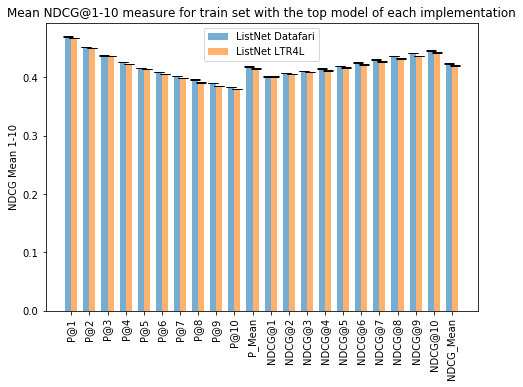

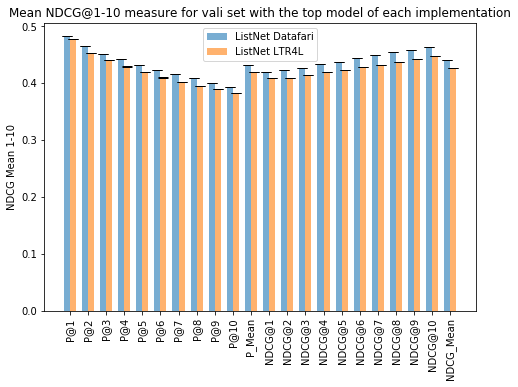

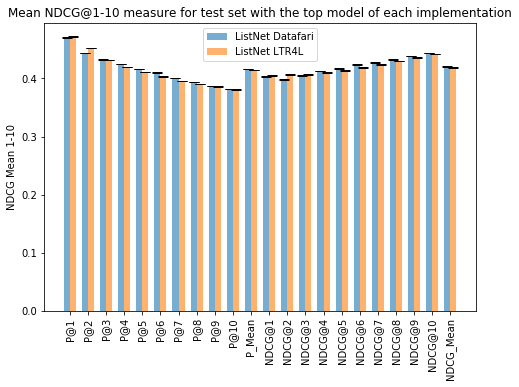

In [33]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, my_listnet_mean[idx_dataset],width, yerr = my_listnet_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet Datafari")
    ax.bar(indices+width/2, ltr4l_mean[idx_dataset],width, yerr = ltr4l_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet LTR4L")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [34]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [35]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"
        ltr4l_path = "../../MQ2007/results_summary/Results_ltr4l_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        ltr4l_df = pd.read_csv(ltr4l_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_NDCG = my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]]
            ltr4l_NDCG = ltr4l_df.iloc[ltr4l_top_model_id][measures_names[idx_metric]]
            diff[idx_metric].append(my_listnet_NDCG - ltr4l_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

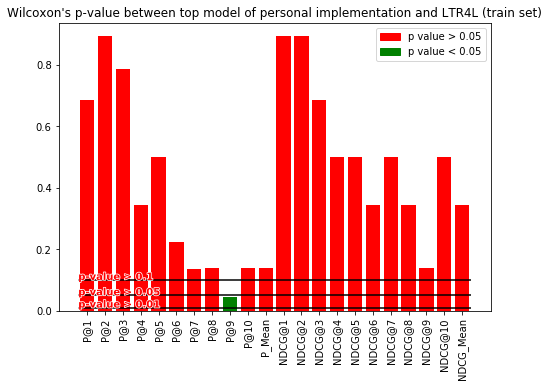

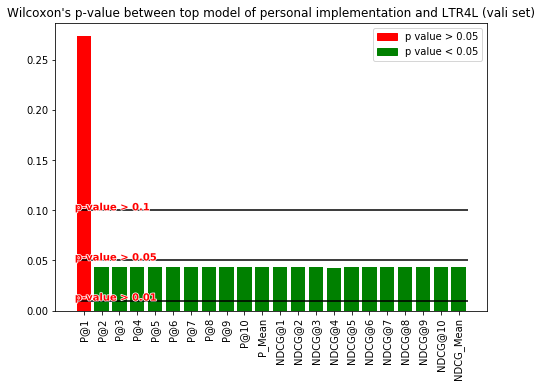

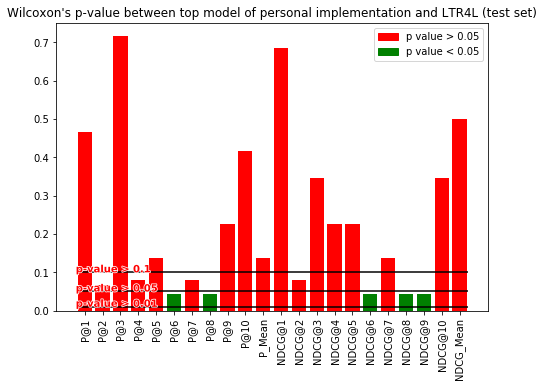

In [36]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of personal implementation and LTR4L ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [37]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,6,7,6.5,4,5,3,2,2,0,2,2,7,7,6,5,5,4,5,4,2,5,4
vali,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
test,3,0,4,1,2,0,1,0,3,4.5,2,6,1,4,3,3,0,2,0,0,4,5


In [38]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.68583,0.892738,0.786457,0.345231,0.500184,0.224916,0.136217,0.138011,0.0431144,0.138011,0.138011,0.892738,0.892738,0.68583,0.500184,0.500184,0.345231,0.500184,0.343028,0.138011,0.500184,0.345231
vali,0.273322,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0421682,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144
test,0.465209,0.0678892,0.715001,0.0796158,0.138011,0.0431144,0.0796158,0.0421682,0.224916,0.416366,0.138011,0.68583,0.0796158,0.345231,0.224916,0.224916,0.0431144,0.138011,0.0431144,0.0431144,0.345231,0.500184
